# 원, 삼각형, 사각형 구분하기 

In [2]:
from google.colab import files
up = files.upload()

Saving handwriting_shape.zip to handwriting_shape.zip


In [3]:
!unzip handwriting_shape.zip -d handwriting_shape > /dev/null

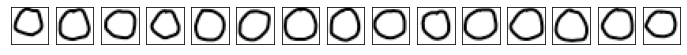

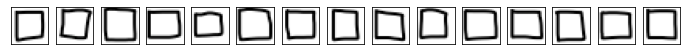

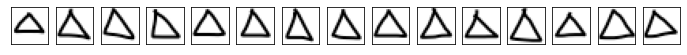

In [6]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

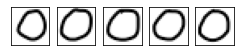

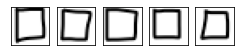

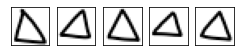

In [7]:
for shape in shapes:
    dir_name = f'handwriting_shape/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

In [8]:
import cv2
cv2.imread(fname).shape

(24, 24, 3)

- 데이터셋 생성하기

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [14]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [17]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정

In [18]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [21]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

- 모델 학습

In [22]:
model.fit_generator(
    train_data_generator,   # 훈련데이터셋을 제공할 제네레이터
    steps_per_epoch = 15,   # 한 epoch에 사용한 스텝 수, 총 45개의 훈련 샘플이 있고, 배치사이즈가 3이므로 15스텝으로 지정
    epochs = 50,
    validation_data=test_data_generator,  # 검증데이터셋을 제공할 제네레이터
    validation_steps = 5    # 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
15/15 [==============================] - 1s 38ms/step - loss: 0.9350 - accuracy: 0.6889 - val_loss: 0.4914 - val_accuracy: 0.8667
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.1538 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 8.1508e-04 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 24ms/step - loss: 5.6188e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 24ms/step - loss: 2.6536e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 25ms/step - loss: 2.1724e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.00

- 모델 평가

In [24]:
model.evaluate(test_data_generator, steps=5)
# 어떤 해석이??

5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 1.0000


[0.0033818951342254877, 1.0]